# Strip sensor

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('seaborn-v0_8-paper')
plt.rcParams["patch.force_edgecolor"] = True
# increse font size numbers on the axes
plt.rcParams.update({'xtick.labelsize': 12})
plt.rcParams.update({'ytick.labelsize': 12})
#set axis label size
plt.rcParams.update({'axes.labelsize': 12})


#figure size
plt.rcParams.update({'figure.figsize': (7, 5)})


## Introduction

In [131]:
# Load the data
currvolt = pd.read_csv('Arisi_Cufino/curr_volt.csv', sep=',')
print(currvolt.values)

[[  0.     0.83]
 [ 10.     1.05]
 [ 20.     1.18]
 [ 30.     1.28]
 [ 40.     1.35]
 [ 50.     1.42]
 [ 60.     1.48]
 [ 70.     1.52]
 [ 80.     1.55]
 [ 90.     1.57]
 [100.     1.6 ]
 [110.     1.63]
 [120.     1.65]
 [130.     1.68]
 [140.     1.7 ]
 [150.     1.71]
 [160.     1.73]
 [170.     1.75]
 [180.     1.76]
 [190.     1.78]
 [200.     1.79]]


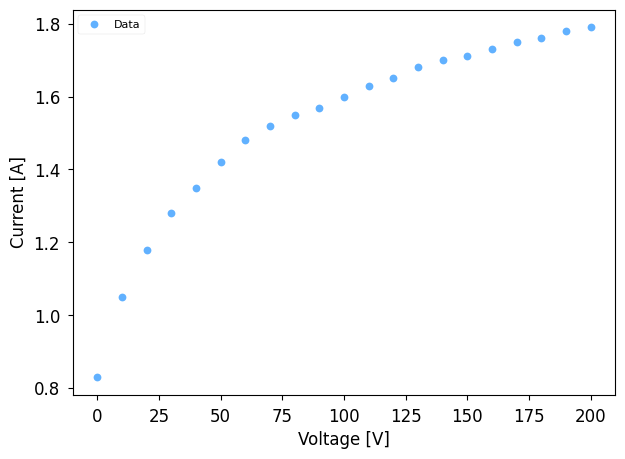

In [132]:
# Plot the data
plt.plot(currvolt.values[:,0], currvolt.values[:,1], 'o', color='dodgerblue',alpha = 0.7, label='Data')
plt.xlabel('Voltage [V]')
plt.ylabel('Current [A]')
plt.legend()

#save the plot
plt.savefig('Plots/iv_curve.png')
plt.show()


## Pedestal noise

In [133]:
# open txt file pandas
pedestal = pd.read_csv('Arisi_Cufino/Pedestal/Pedestal.txt', sep=';', header=None)
print(pedestal.values.shape)

#store the mean of each row in a new array
p = np.mean(pedestal.values, axis=1)
print(pedestal.values.shape[0])

# transofrm pedestal valiues 
pedestal.values 

# plt.bar(np.linspace(1,pedestal.values.shape[0],pedestal.values.shape[0]), pedestal.values, width=1.0)




(128, 1000)
128


array([[517., 519., 522., ..., 524., 517., 518.],
       [519., 516., 513., ..., 516., 515., 517.],
       [512., 516., 514., ..., 521., 513., 517.],
       ...,
       [515., 515., 510., ..., 516., 513., 515.],
       [518., 512., 514., ..., 516., 512., 517.],
       [515., 517., 510., ..., 521., 516., 513.]])

(128, 1000)
(128,)


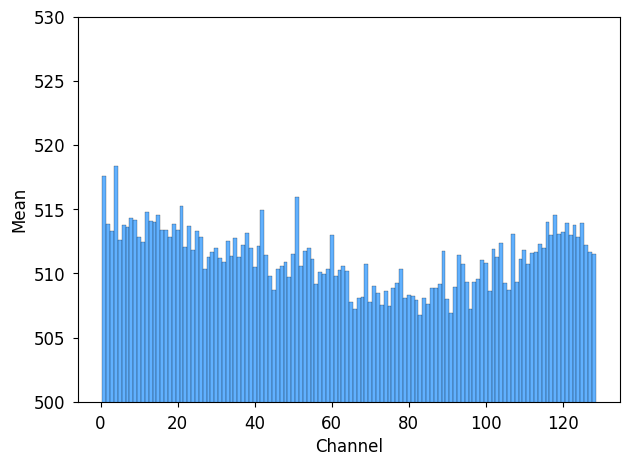

In [134]:
# open txt file pandas
pedestal = pd.read_csv('Arisi_Cufino/Pedestal/Pedestal.txt', sep=';', header=None)
print(pedestal.values.shape)

#store the mean of each row in a new array
p = np.mean(pedestal.values, axis=1)
print(p.shape)

#plot as hisogram using bar
plt.bar(np.linspace(1,pedestal.values.shape[0],pedestal.values.shape[0]), p, width=1.0,  color='dodgerblue',alpha = 0.7, label='Data')
#set y limit
plt.ylim(500, 530)
plt.xlabel('Channel')
plt.ylabel('Mean')

#save the plot
plt.savefig('Plots/pedestal.png')

plt.show()

In [135]:
p.shape

(128,)

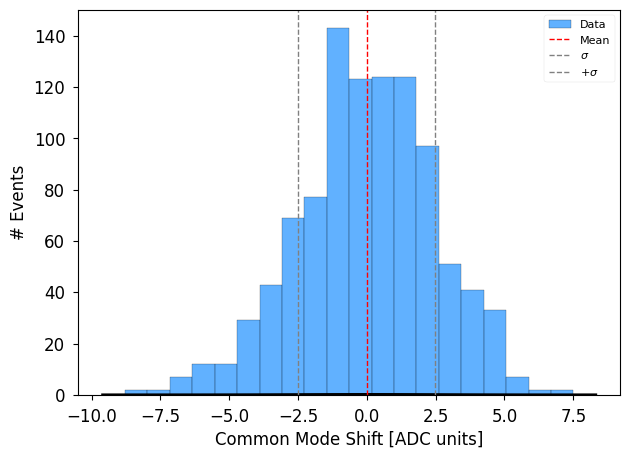

In [136]:
# compute D(k) = (1/128) * sum_{i=1}^{128} (ADC_{i,k} - p_{i})
# where p_{i} is the mean of the k-th row and ADC_{i,k} is the i-th value of the k-th row
D = np.zeros(1000)
for k in range(1000):
        D[k] = np.sum(pedestal.values[:,k] - p, axis=0) / 128

# plot the D(k) values as histogram
plt.hist(D, bins=20,  color='dodgerblue',alpha = 0.7, label='Data')
plt.xlabel('Common Mode Shift [ADC units]')
plt.ylabel('# Events')
#save the plot
plt.savefig('Plots/Dk.png')

#fit a gaussian to the data
from scipy.stats import norm
mu, std = norm.fit(D)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pp = norm.pdf(x, mu, std)
plt.plot(x, pp, 'k', linewidth=2)

#plot in the graph the mean and std
plt.axvline(mu, color='r', linestyle='dashed', linewidth=1, label='Mean')

plt.axvline(mu + std, color='gray', linestyle='dashed', linewidth=1, label='$\sigma$')
plt.axvline(mu - std, color='gray', linestyle='dashed', linewidth=1, label='+$\sigma$')

plt.legend()
plt.savefig('Plots/Dk.png')
plt.show()

In [137]:
pedestal.values[127,:].shape
p[126].shape

()

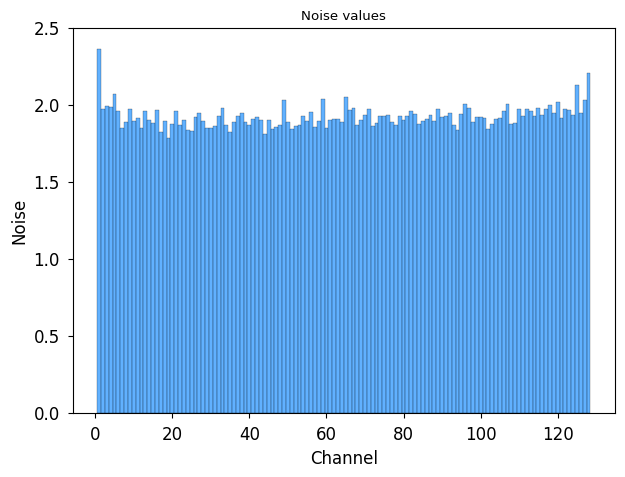

In [138]:
# compute noise
# noise(i) = sqrt(1/(1000 -1) sum_{k=1}^{1000} (pedestal.values(i,k) - p(i) - D_{i})^2)

noise = np.zeros(128)

for i in range(128):
    noise[i] = np.sqrt(1/(1000-1) * np.sum((pedestal.values[i,:] - p[i] - D)**2))

#plot using bar
plt.bar(np.linspace(1,128,128), noise, width=1.0,  color='dodgerblue',alpha = 0.7, label='Data')

plt.ylim(0, 2.5)
plt.xlabel('Channel')
plt.ylabel('Noise')
plt.title('Noise values')

#save the plot
plt.savefig('Plots/noise.png')

plt.show()


# Calibration

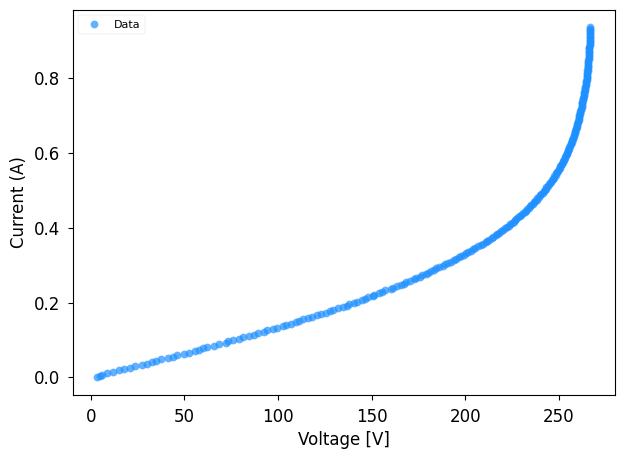

In [139]:
#open csv file
l = 'Arisi_Cufino/Calib/calibrationmeasurement_givendata.txt'
calib = pd.read_csv(l, sep=';', header=None)
#remove the first 2 rows
calib = calib.drop([0,1])

#separate the columns
calib = calib[0].str.split(' ', expand=True)

#separate the column in 2 with \t as separator
calib = calib[0].str.split('\t', expand=True)

#convert the values to float
calib = calib.astype(float)

calib[0] = calib[0] * 3.6
calib[0] = calib[0] * 1e-6

#plot the data
plt.plot(calib[1], calib[0], 'o',  color='dodgerblue',alpha = 0.7, label='Data')
plt.xlabel('Voltage [V]')
plt.ylabel('Current (A)')
plt.legend()

plt.show()


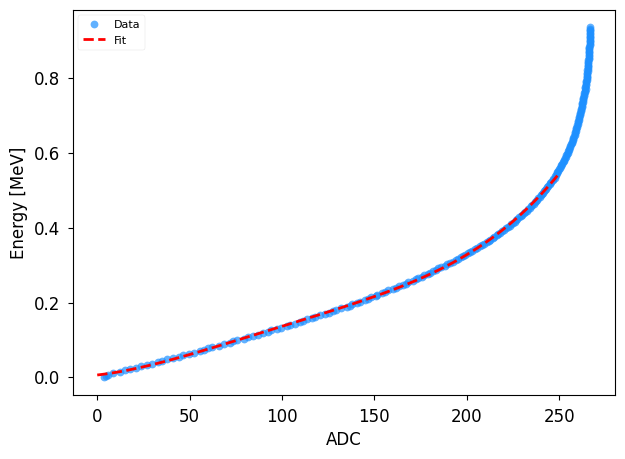

array([ 6.19367064e-03,  5.51867176e-04,  1.56973829e-05, -1.11778643e-07,
        2.98625747e-10])

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define your polynomial function
def f_conv(x, a, b, c, d, e):
    return a + b*x + c*x**2 + d*x**3 + e*x**4

# Define the fit range
fit_range_min = 0
fit_range_max = 250

# Filter the data within the fit range
x_fit = calib[1][(calib[1] >= fit_range_min) & (calib[1] <= fit_range_max)]
y_fit = calib[0][(calib[1] >= fit_range_min) & (calib[1] <= fit_range_max)]



# Fit the filtered data
popt_conv, pcov_conv = curve_fit(f_conv, x_fit, y_fit)

# Plot the data
plt.plot(calib[1], calib[0], 'o', color='dodgerblue', alpha=0.7, label='Data')

# Plot the fit
x_plot = np.linspace(fit_range_min, fit_range_max, 100)  # Generate x values for the plot
plt.plot(x_plot, f_conv(x_plot, *popt_conv), label='Fit', color='red', linewidth=2, linestyle='--')

plt.xlabel('ADC')
plt.ylabel('Energy [MeV]')
plt.legend()

#save the plot
plt.savefig('Plots/calibration.png')

plt.show()

popt_conv

In [141]:
#print the fit parameters with labels and values
print('Fit parameters and their errors:')
print('a =', popt_conv[0], '+/-', np.sqrt(pcov_conv[0, 0]))
print('b =', popt_conv[1], '+/-', np.sqrt(pcov_conv[1, 1]))
print('c =', popt_conv[2], '+/-', np.sqrt(pcov_conv[2, 2]))
print('d =', popt_conv[3], '+/-', np.sqrt(pcov_conv[3, 3]))
print('e =', popt_conv[4], '+/-', np.sqrt(pcov_conv[4, 4]))
    

Fit parameters and their errors:
a = 0.006193670640699844 +/- 0.0017329697578610135
b = 0.0005518671756216927 +/- 9.028899168164082e-05
c = 1.5697382925455127e-05 +/- 1.3810119365198896e-06
d = -1.1177864306236193e-07 +/- 7.854168321577519e-09
e = 2.986257472172733e-10 +/- 1.4847257753846536e-11


# Measuring the strip sensors by using the laser

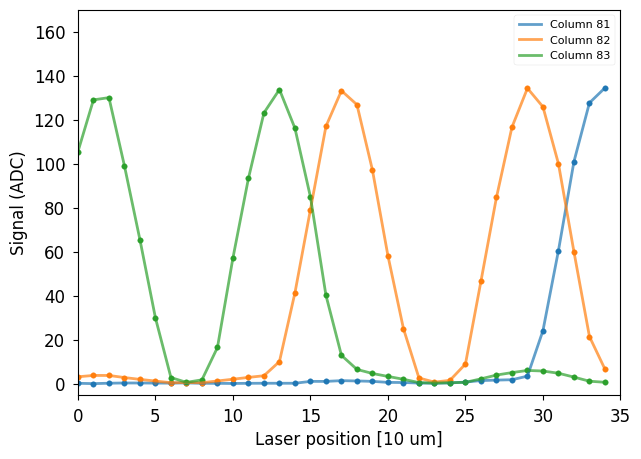

In [142]:
# Read the data
# laserscan = pd.read_csv('Arisi_Cufino/Laserscan/Laserscan.txt', sep='\t', header=None)
laserscan = pd.read_csv('Given_data/Laserscan.txt', sep='\t', header=None)


# Plot all the columns from 65 to 79
for i in range(81, 84):
    plt.scatter(np.linspace(0, 34, laserscan[i].shape[0]), laserscan[i], s=16)
    plt.plot(laserscan[i], label='Column ' + str(i), linewidth=2, alpha=0.7)


plt.xlim(0, 35)
plt.ylim(-5, 170)
plt.xlabel('Laser position [10 um]')
plt.ylabel('Signal (ADC)')
plt.legend()
#save the plot
# plt.savefig('Plots/laserscan.png')
plt.show()


# # Plot scatter plot for columns
# for i in range(0, 80):
#     plt.scatter(np.linspace(0, 34, laserscan[i].shape[0]), laserscan[i], label='Strip ' + str(i), s=3)
# plt.xlabel('Row')
# plt.ylabel('ADC')
# plt.title('Laserscan')
# # plt.legend()
# plt.show()

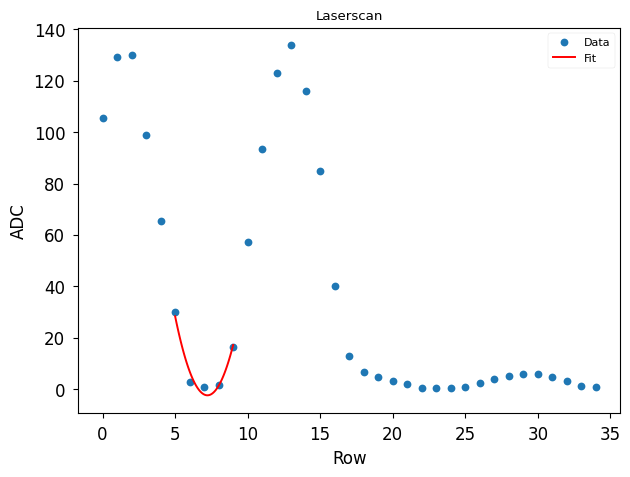

28.357998428565708
5.0


In [143]:
# perform a fit for the maximum for 2 different coulmns using a parabola
def f(x, a, b, c):
    return a + b*x + c*x**2

# Define the fit range
fit_range_min = 5
fit_range_max = 9

#select the columns
s1 = laserscan[83]

# Filter the data within the fit range
x_fit = np.linspace(fit_range_min, fit_range_max, 5)
y_fit = s1[(s1.index >= fit_range_min) & (s1.index <= fit_range_max)]

# Fit the filtered data
popt, pcov = curve_fit(f, x_fit, y_fit)

# Plot the data
plt.plot(s1, 'o', label='Data')

# Plot the fit
x_plot = np.linspace(fit_range_min, fit_range_max, 100)  # Generate x values for the plot
plt.plot(x_plot, f(x_plot, *popt), label='Fit', color='red')

plt.xlabel('Row')
plt.ylabel('ADC')
plt.title('Laserscan')
plt.legend()
plt.show()

#find the maximum of the fit
max0 = f(x_plot, *popt).max()
print(max0)

#find the x value of the maximum
max0_x = x_plot[f(x_plot, *popt).argmax()]
print(max0_x)

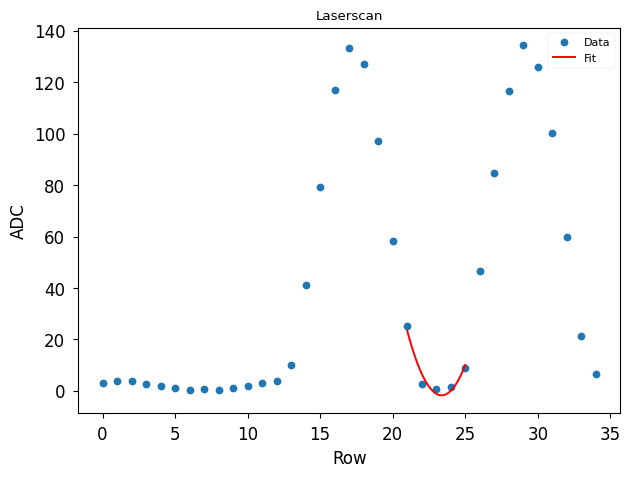

23.38913254189697
21.0


In [144]:
#do the same for another column with a different fit range
fit_range_min = 21
fit_range_max = 25

s2 = laserscan[82]

# Filter the data within the fit range
x_fit = np.linspace(fit_range_min, fit_range_max, 5)
y_fit = s2[(s2.index >= fit_range_min) & (s2.index <= fit_range_max)]

# Fit the filtered data
popt_2, pcov = curve_fit(f, x_fit, y_fit)

# Plot the data
plt.plot(s2, 'o', label='Data')

# Plot the fit
x_plot_2 = np.linspace(fit_range_min, fit_range_max, 100)  # Generate x values for the plot
plt.plot(x_plot_2, f(x_plot_2, *popt_2), label='Fit', color='red')

plt.xlabel('Row')
plt.ylabel('ADC')
plt.title('Laserscan')
plt.legend()
plt.show()

#find the maximum of the fit
max1 = f(x_plot_2, *popt_2).max()
print(max1)

#find the x value of the maximum
max1_x = x_plot_2[f(x_plot_2, *popt_2).argmax()]
print(max1_x)

In [145]:
#display the 2 maximums
print((max1_x - max0_x) * 10)

160.0


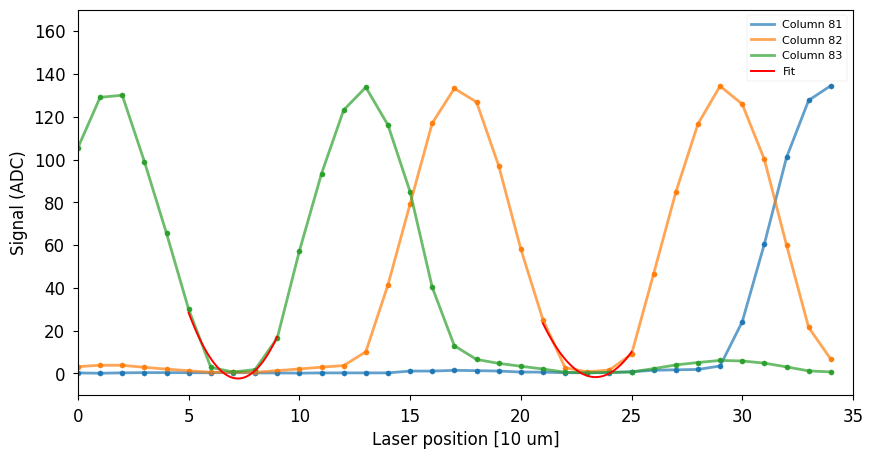

In [146]:
#now mix plots togheter
#dimensions of the plot
plt.figure(figsize=(10, 5))

# Plot all the columns from 65 to 79
for i in range(81, 84):
    plt.scatter(np.linspace(0, 34, laserscan[i].shape[0]), laserscan[i], s=14)
    plt.plot(laserscan[i], label='Column ' + str(i), linewidth=2, alpha=0.7)


#plot the fit on top of the data
plt.plot(x_plot, f(x_plot, *popt), label='Fit', color='red')

#plot the second fit
plt.plot(x_plot_2, f(x_plot_2, *popt_2), color='red')

plt.xlim(0, 35)
plt.ylim(-10, 170)
plt.xlabel('Laser position [10 um]')
plt.ylabel('Signal (ADC)')
plt.legend()

#save the plot
plt.savefig('Plots/laserscan_fit.png')

plt.show()

# CCEL and CCEQ

In [147]:
a = "job_1.txt"
l = a.split('job_')[1].split('.txt')[0]
print(l)

1


In [148]:
# import os
# import pandas as pd
# import numpy as np

# # Get the list of files in the folder
# files = os.listdir('Simulations')

# print(files)

# #save the number that is in the name of the files
# numeri = [int(f.split('job_')[1].split('.txt')[0]) for f in files]
# print(numeri)


# # Create an empty list to store the data
# data = []

# # Loop over the files
# for file in files:
#     # Read the data
#     df = pd.read_csv('Simulations/' + file, sep=' ', header=None)
#     # Remove the first row
#     df = df.drop([0])
#     # Store the data in the list
#     data.append(df)

# # Convert the list to a numpy array
# data = np.array(data)


['.DS_Store', '0CCEL.txt', '100CCEL.txt', '10CCEL.txt', '110CCEL.txt', '120CCEL.txt', '130CCEL.txt', '140CCEL.txt', '150CCEL.txt', '160CCEL.txt', '170CCEL.txt', '180CCEL.txt', '190CCEL.txt', '200CCEL.txt', '20CCEL.txt', '30CCEL.txt', '40CCEL.txt', '50CCEL.txt', '60CCEL.txt', '70CCEL.txt', '80CCEL.txt', '90CCEL.txt']
[0, 100, 10, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 20, 30, 40, 50, 60, 70, 80, 90]


(21, 128)


Text(0, 0.5, 'Normalized sum')

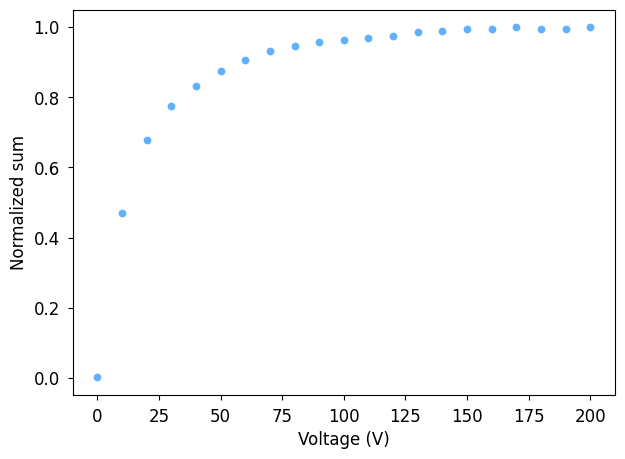

In [149]:
# read and store all the file in the folder CCEL
import os
import pandas as pd
import numpy as np

# Get the list of files in the folder
files = os.listdir('Given_data/CCEL')

#odrer the files by name in ascending order since there is a number in the name
files.sort()

print(files)

#remove .DS_Store
files.remove('.DS_Store')

#save the number that is in the name of the files
voltage = [int(f.split('CCEL.txt')[0]) for f in files]
print(voltage)


# Create an empty list to store the data
data = []

# Loop over the files
for file in files:
    # Read the data
    df = pd.read_csv('Given_data/CCEL/' + file, sep=';', header=None)
    # Remove the first row
    df = df.drop([0])
    # Store the data in the list
    data.append(df)

# Convert the list to a numpy array
data = np.array(data)

#reshape the data
data = data.reshape(data.shape[0], data.shape[1])

# order the data by the first column

#convert the data to float
data = data.astype(float)

# Print the shape of the data
print(data.shape)


# summ al the values for each column
sums = np.sum(data, axis=1)

max_sum = sums.max()

#divide the sum by the maximum sum
norm = sums / max_sum

#order the data by the voltage
voltage, norm = zip(*sorted(zip(voltage, norm)))

#plot the data
plt.plot(voltage, norm, 'o', color='dodgerblue', alpha=0.7, label='Data')
plt.xlabel('Voltage (V)')
plt.ylabel('Normalized sum')


# CCEQ

['130_Cluster_adc_entries.txt', '40_Cluster_adc_entries.txt', '170_Cluster_adc_entries.txt', '200_Cluster_adc_entries.txt', '80_Cluster_adc_entries.txt', '10_Cluster_adc_entries.txt', '160_Cluster_adc_entries.txt', '50_Cluster_adc_entries.txt', '120_Cluster_adc_entries.txt', '90_Cluster_adc_entries.txt', '180_Cluster_adc_entries.txt', '100_Cluster_adc_entries.txt', '70_Cluster_adc_entries.txt', '140_Cluster_adc_entries.txt', '30_Cluster_adc_entries.txt', '190_Cluster_adc_entries.txt', '20_Cluster_adc_entries.txt', '150_Cluster_adc_entries.txt', '60_Cluster_adc_entries.txt', '110_Cluster_adc_entries.txt', '0_Cluster_adc_entries.txt']
[130, 40, 170, 200, 80, 10, 160, 50, 120, 90, 180, 100, 70, 140, 30, 190, 20, 150, 60, 110, 0]
[1001881.24962181, 604455.2327408469, 1024372.1993571818, 1035278.315530308, 923698.6553452221, 210325.90321593793, 1027789.330477462, 693749.1024551899, 1003834.8070446802, 956724.3293314755, 1033569.2696508066, 970331.4689646967, 865281.5848279592, 1007191.31643

/var/folders/9_/9sylzz7s6t7d2tn8wfrg3r380000gn/T/ipykernel_8894/2829598541.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(data)


Text(0.5, 1.0, 'CCEQ')

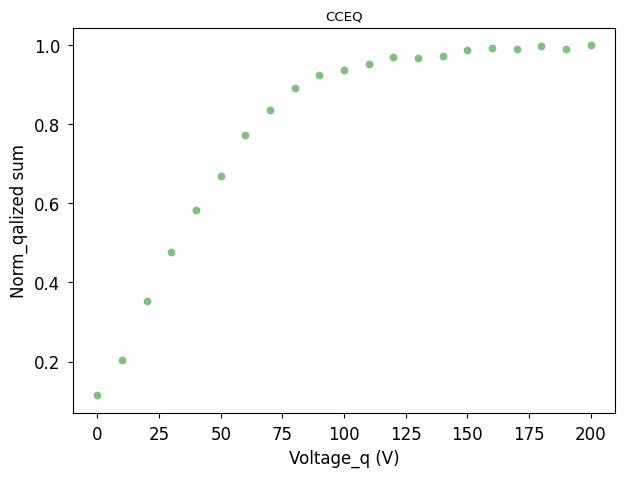

In [150]:
# Get the list of files in the folder
files = os.listdir('Arisi_Cufino/CCEQ')

# Take only the .txt files
files = [f for f in files if '.txt' in f]
print(files)

# Save the number that is in the name of the files
voltage_q = [int(f.split('_Cluster_adc_entries.txt')[0]) for f in files]
print(voltage_q)

# Create an empty list to store the data
data = []

# Loop over the files
for file in files:
    with open("Arisi_Cufino/CCEQ/" + file , "r") as file:
        # Read the content of the file
        content = file.read()

    # Split the content by whitespace to get individual values
    values_str = content.split()

    # Convert each value to a float
    values = [float(val) for val in values_str]

    # Print the array of values
    data.append(values)

# Convert the list to a numpy array
data = np.array(data)

data[20] = data[20][:10000]

# summ al the values for each element
sums  = []
for i in range(len(data)):
    sums.append(sum(data[i]))

print(sums)

max_sum = max(sums)

sums = np.array(sums)

# #divide the sum by the maximum sum
norm_q = sums / max_sum

# #order the data by the voltage_q
voltage_q, norm_q = zip(*sorted(zip(voltage_q, norm_q)))

#plot the data
plt.plot(voltage_q, norm_q, 'o', color = 'green', alpha=0.5, label='Data')
plt.xlabel('Voltage_q (V)')
plt.ylabel('Norm_qalized sum')
plt.title('CCEQ')


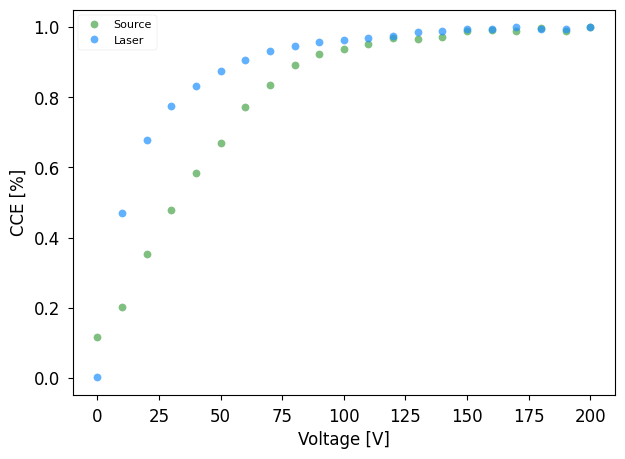

In [151]:
#plot CCEQ and CCEL in the same graph
#plot the data
plt.plot(voltage_q, norm_q, 'o', label = 'Source', color='green', alpha=0.5)
plt.plot(voltage, norm, 'o', label = 'Laser', color='dodgerblue', alpha=0.7)
plt.legend()
plt.xlabel('Voltage [V]')
plt.ylabel('CCE [%]')

#save the plot
plt.savefig('Plots/CCEQ_CCEL.png')

plt.show()

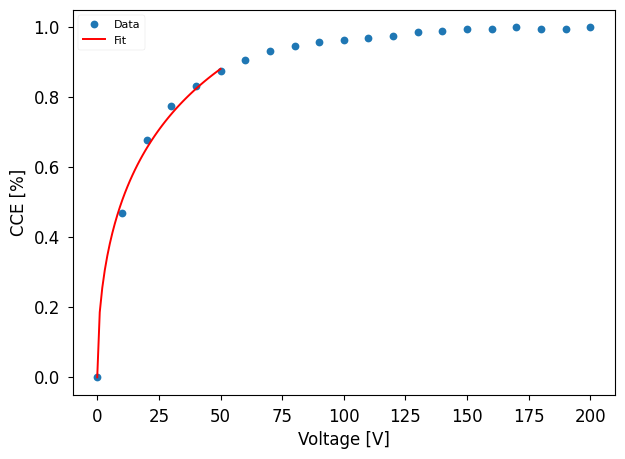

Fit parameters and their errors:
a = 235.941173616246 +/- 24.882337549235174


In [152]:
#now fit the data of the CCEL
def f(x, a):
    D = 300
    U_dep = 80
    return (1 - np.exp(-(D * np.sqrt(x/U_dep))/a)) / (1 - np.exp(-D/a))


#set the range of the parameter a allowed for the fit
a_min = 1
a_max = 300

# Filter the data within the fit range
voltage = np.array(voltage)
norm = np.array(norm)

# fit the voltage_q and norm_q
popt, pcov = curve_fit(f, voltage[:9], norm[:9], bounds=(a_min, a_max))

# Plot the data
plt.plot(voltage, norm, 'o', label='Data')

# Plot the fit
x_plot = np.linspace(0, 50, 50)  # Generate x values for the plot
plt.plot(x_plot, f(x_plot, *popt), label='Fit', color='red')

plt.xlabel('Voltage [V]')
plt.ylabel('CCE [%]')
plt.legend()

plt.savefig('Plots/CCEL_fit.png')
plt.show()

# print the fit parameters
print('Fit parameters and their errors:')
print('a =', popt[0], '+/-', np.sqrt(pcov[0, 0]))


# Large source scan

(128,)


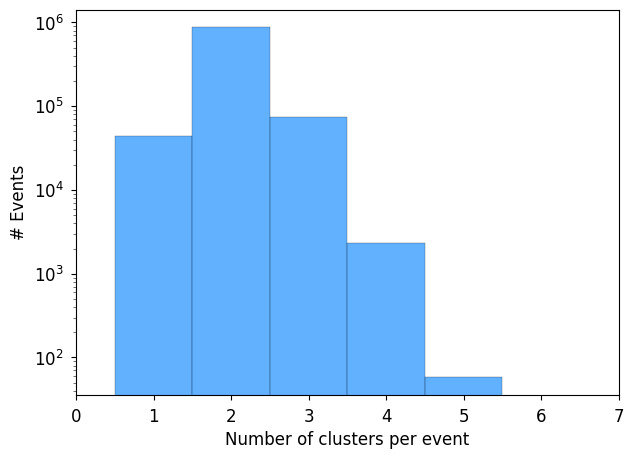

In [153]:
num_clu = pd.read_csv('Given_data/number_of_clusters.txt', header=None)
#remove the first row
num_clu = num_clu.drop([0])

#convert the values to float
num_clu = num_clu.astype(float)
num_clu = num_clu.values
num_clu = num_clu.reshape(num_clu.shape[0])
print(num_clu.shape)

#plot the data as histogram, the position is the bin and the value is the frequency
plt.bar(np.linspace(1,num_clu.shape[0],num_clu.shape[0]), num_clu, width=1.0, color='dodgerblue',alpha = 0.7, label='Data')
plt.xlim(0, 7)
plt.yscale('log')
plt.xlabel('Number of clusters per event')
plt.ylabel('# Events')

#save the plot
plt.savefig('Plots/number_of_clusters.png')
plt.show()


(128,)


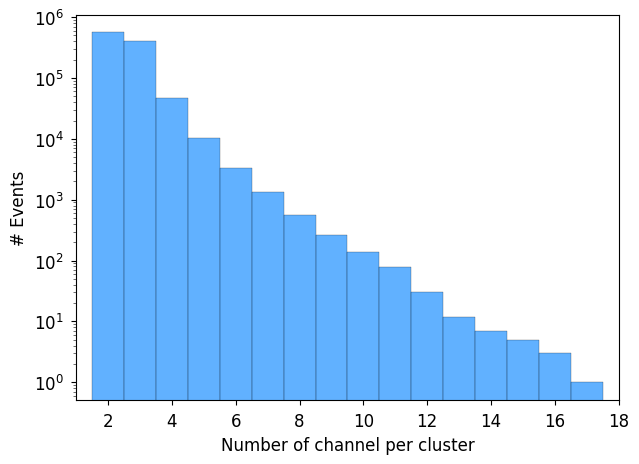

In [154]:
clus_size = pd.read_csv('Given_data/cluster_size.txt', header=None)
#remove the first row
clus_size = clus_size.drop([0])

#convert the values to float
clus_size = clus_size.astype(float)
clus_size = clus_size.values
clus_size = clus_size.reshape(clus_size.shape[0])
print(clus_size.shape)

#plot the data as histogram, the position is the bin and the value is the frequency
plt.bar(np.linspace(1,clus_size.shape[0],clus_size.shape[0]), clus_size, width=1.0, color='dodgerblue',alpha = 0.7, label='Data')
#set log scale
plt.yscale('log')
plt.xlim(1, 18)
plt.xlabel('Number of channel per cluster')
plt.ylabel('# Events')

#save the plot
plt.savefig('Plots/cluster_size.png')
plt.show()


(128,)


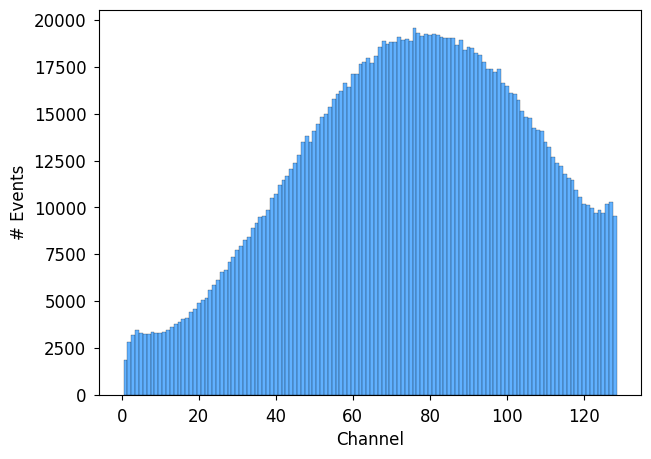

In [155]:
hitma = pd.read_csv('Given_data/hitmap.txt', header=None)
#remove the first row
hitma = hitma.drop([0])

#convert the values to float
hitma = hitma.astype(float)
hitma = hitma.values
hitma = hitma.reshape(hitma.shape[0])
print(hitma.shape)

#plot the data as histogram, the position is the bin and the value is the frequency
plt.bar(np.linspace(1,hitma.shape[0],hitma.shape[0]), hitma, width=1.0, color='dodgerblue',alpha = 0.7, label='Data')
plt.ylabel('# Events')
plt.xlabel('Channel')

#save the plot
plt.savefig('Plots/hitmap.png')
plt.show()


In [156]:
# with open("Given_data/Cluster_adc_entries.t", "r") as file:
#     # Read the content of the file
#     content = file.read()

# # Split the content by whitespace to get individual values
# values_str = content.split()

# # Convert each value to a float
# values = [float(val) for val in values_str]

# print(len(values))

/var/folders/9_/9sylzz7s6t7d2tn8wfrg3r380000gn/T/ipykernel_8894/2922659914.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result_array = np.array(arrays)


(1032986,)


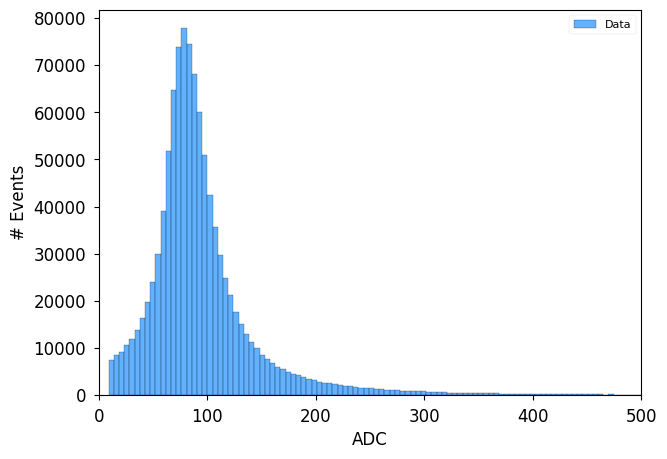

In [157]:
# Read the file line by line
with open('Given_data/Cluster_adc_entries.txt', 'r') as file:
    lines = file.readlines()

# Initialize an empty list to store NumPy arrays
arrays = []

# Process each line
for line in lines:
    # Split the line by commas
    values = line.strip().split(',')
    
    # Convert values to floats
    floats = [float(value) for value in values]
    
    # Convert the list of floats to a NumPy array
    array = np.array(floats)
    
    # Append the NumPy array to the list
    arrays.append(array)

# Convert the list of NumPy arrays to a single NumPy array
result_array = np.array(arrays)

# Print the resulting NumPy array
print(result_array.shape)

#sum all the values for each row
for i in range(result_array.shape[0]):
    result_array[i] = np.sum(result_array[i])

#plot the data as histogram, the position is the bin and the value is the frequency
aaaa = plt.hist(result_array, bins=200, color='dodgerblue',alpha = 0.7, label='Data')
plt.ylabel('# Events')
plt.xlabel('ADC')
plt.legend()

plt.xlim(0, 500)
#save the plot
plt.savefig('Plots/Cluster_adc_entries.png')

plt.show()


0.16435076281145003


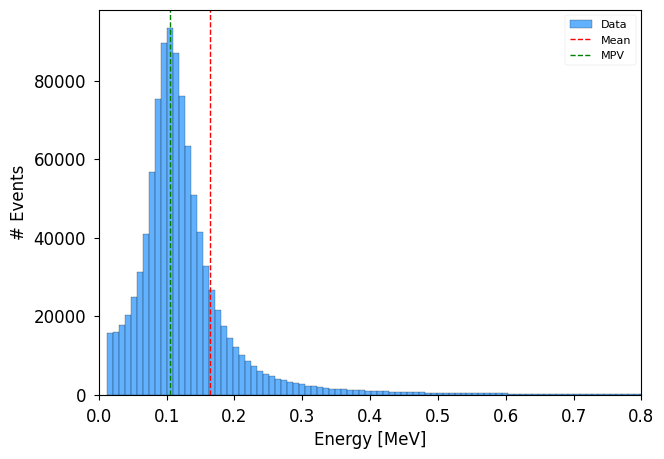

In [158]:
#cpnvert adc to energy using f_conv
energy = f_conv(result_array, *popt_conv)

#plot the data as histogram, the position is the bin and the value is the frequency
aaaa = plt.hist(energy, bins=20000, color='dodgerblue',alpha = 0.7, label='Data')
plt.ylabel('# Events')
plt.xlabel('Energy [MeV]')

#plot line for most common energy
plt.axvline(energy.mean(), color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(0.105, color='g', linestyle='dashed', linewidth=1, label='MPV')
print(energy.mean())
plt.legend()


plt.xlim(0, 0.8)
#save the plot
plt.savefig('Plots/Cluster_adc_entries_energy.png')

plt.show()

In [159]:
aaaa[1][:10]

array([0.012316  , 0.02114738, 0.02997877, 0.03881015, 0.04764153,
       0.05647291, 0.0653043 , 0.07413568, 0.08296706, 0.09179845])

In [160]:
aaaa[0].max()

n = 0
#save the index of the max
for v in aaaa[0]:
    n = n+1
    if v == aaaa[0].max():
        print(v,n)
        print(aaaa[1][n])

93328.0 11
0.10946121042852015
